In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
chocolate_flavor = "dataset/flavors_of_cacao.csv"
cacao_ratings = pd.read_csv(chocolate_flavor)
cacao_ratings = cacao_ratings.rename(columns={"Broad Bean\nOrigin": "bean_origin"})
cacao_ratings = cacao_ratings.rename(columns={"Company\nLocation": "company_loc"})
cacao_ratings.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,company_loc,Rating,Bean\nType,bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
cacao_ratings.sort_values(by=['Rating'],ascending=False)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,company_loc,Rating,Bean\nType,bean_origin
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70%,Italy,5.0,Blend,
222,Bonnat,Kaori,1339,2014,75%,France,4.0,,Brazil
76,Amedei,Porcelana,111,2007,70%,Italy,4.0,Criollo (Porcelana),Venezuela
1663,Tobago Estate (Pralus),"Roxborough, Tobago",895,2012,70%,France,4.0,Trinitario,Tobago
...,...,...,...,...,...,...,...,...,...
245,Bonnat,One Hundred,81,2006,100%,France,1.5,,
437,Claudio Corallo,Principe,252,2008,100%,Sao Tome,1.0,Forastero,Sao Tome & Principe
465,Cote d' Or (Kraft),Sensations Intense,48,2006,70%,Belgium,1.0,,
326,Callebaut,Baking,141,2007,70%,Belgium,1.0,,Ecuador


In [4]:
rating_by_company_loc = cacao_ratings.groupby(["company_loc"])
mean_rating_by_company_loc = pd.DataFrame(rating_by_company_loc["Rating"].mean())
mean_rating_by_company_loc.reset_index(inplace=True)
mean_rating_by_company_loc
rank_mean_rating_company_loc = mean_rating_by_company_loc.sort_values(by=['Rating'],ascending=False)
rank_mean_rating_company_loc.head(10)

,company_loc,Rating
8,Chile,3.750000
0,Amsterdam,3.500000
35,Netherlands,3.500000
40,Philippines,3.500000
25,Iceland,3.416667
58,Vietnam,3.409091
6,Brazil,3.397059
41,Poland,3.375000
2,Australia,3.357143
22,Guatemala,3.350000


In [24]:
rating_by_origin = cacao_ratings.groupby(["bean_origin"])
mean_rating_by_origin = pd.DataFrame(rating_by_origin["Rating"].mean())
mean_rating_by_origin.reset_index(inplace=True)
mean_rating_by_origin
rank_mean_rating_origin = mean_rating_by_origin.sort_values(by=['Rating'],ascending=False)
rank_mean_rating_origin.set_index("bean_origin", inplace=True)
top_rating_by_origin = rank_mean_rating_origin.loc[["Venezuela","Ecuador","Peru","Madagascar","Dominican Republic","Nicaragua","Brazil","Bolivia","Belize"]]
top_rating_by_origin

,Rating
bean_origin,
Venezuela,3.245327
Ecuador,3.134715
Peru,3.137879
Madagascar,3.265517
Dominican Republic,3.209220
Nicaragua,3.200000
Brazil,3.284483
Bolivia,3.197368
Belize,3.234694


In [29]:
count_of_rating_by_origin = cacao_ratings.groupby(["bean_origin"])
counts_rating_by_origin = pd.DataFrame(count_of_rating_by_origin["Rating"].count())
counts_rating_by_origin.reset_index(inplace=True)
#pick the top5 most reviews by bean origin 
counts_rating_by_origin = counts_rating_by_origin.rename(columns={"Rating":"counts_of_rating"})
rank_counts_rating_origin = counts_rating_by_origin.sort_values(by=['counts_of_rating'],ascending=False)
rank_counts_rating_origin.set_index("bean_origin", inplace=True)
most_counts_by_origin = rank_counts_rating_origin.iloc[0:10]
most_counts_by_origin.dropna()


,counts_of_rating
bean_origin,
Venezuela,214
Ecuador,193
Peru,165
Madagascar,145
Dominican Republic,141
,73
Nicaragua,60
Brazil,58
Bolivia,57


In [15]:
bean_origin_places = "dataset/GDP_bean_production_current$_v4-1.csv"
bean_origin_gdps = pd.read_csv(bean_origin_places)
bean_origin_gdps = bean_origin_gdps.rename(columns={"Broad Bean\nOrigin": "bean_origin"})
bean_origin_gdps = bean_origin_gdps.drop_duplicates()
bean_origin_gdps.set_index("bean_origin", inplace=True)
bean_origin_gdps

,Income group,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
bean_origin,,,,,,,,,,,,,,,
Sao Tome,Lower middle income,Sub-Saharan Africa,142775106.8,149146923.1,188021168.8,187821029,197454052.1,233213521.7,252560556,302925488.1,348941656.4,318265835.3,347545391.8,375040173.8,422296762.3
Togo,Low income,Sub-Saharan Africa,2349495621,2659095101,3310277927,3365711796,3426022206,3867391618,3873529926,4320427496,4568900620,4179185205,4414908597,4765866980,5300214337
Peru,Upper middle income,Latin America & Caribbean,88643193062,1.02E+11,1.21E+11,1.21E+11,1.48E+11,1.72E+11,1.93E+11,2.01E+11,2.01E+11,1.90E+11,1.92E+11,2.11E+11,2.22E+11
Venezuela,Upper middle income,Latin America & Caribbean,1.83E+11,2.30E+11,3.16E+11,3.30E+11,3.93E+11,3.16E+11,3.81E+11,3.71E+11,4.82E+11,0,0,0,0
Cuba,Upper middle income,Latin America & Caribbean,52742800000,58603900000,60806300000,62080000000,64328000000,68990000000,73141000000,77148000000,80656000000,87133000000,91370000000,96851000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Suriname,Upper middle income,Latin America & Caribbean,2626493057,2936440801,3532961749,3875555556,4368398048,4422276622,4980000000,5145757576,5240606061,4787367928,3167164371,3068766110,3427269682
"Peru, Ecuador",Upper middle income,Latin America & Caribbean,88643193062,1.02E+11,1.21E+11,1.21E+11,1.48E+11,1.72E+11,1.93E+11,2.01E+11,2.01E+11,1.90E+11,1.92E+11,2.11E+11,2.22E+11
"Ecuador, Mad., PNG",Upper middle income,Latin America & Caribbean,46802044000,51007777000,61762635000,62519686000,69555367000,79276664000,87924544000,95129659000,1.02E+11,99290381000,99937696000,1.04E+11,1.08E+11


In [16]:
top_origins = bean_origin_gdps.loc[["Venezuela","Ecuador","Peru","Madagascar","Dominican Republic","Nicaragua","Brazil","Bolivia","Belize"]]
top_origins = top_origins.drop_duplicates()
top_origins = top_origins.drop(columns=['Income group', 'Region'])
top_origins = top_origins.apply(pd.to_numeric)
top_origins['avg_gdp'] = top_origins.mean(axis=1)
top_origins

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,avg_gdp
bean_origin,,,,,,,,,,,,,,
Venezuela,1.830000e+11,2.300000e+11,3.160000e+11,3.300000e+11,3.930000e+11,3.160000e+11,3.810000e+11,3.710000e+11,4.820000e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.309231e+11
Ecuador,4.680204e+10,5.100778e+10,6.176264e+10,6.251969e+10,6.955537e+10,7.927666e+10,8.792454e+10,9.512966e+10,1.020000e+11,9.929038e+10,9.993770e+10,1.040000e+11,1.080000e+11,8.209280e+10
Peru,8.864319e+10,1.020000e+11,1.210000e+11,1.210000e+11,1.480000e+11,1.720000e+11,1.930000e+11,2.010000e+11,2.010000e+11,1.900000e+11,1.920000e+11,2.110000e+11,2.220000e+11,1.663572e+11
Madagascar,5.515884e+09,7.342923e+09,9.413003e+09,8.550364e+09,8.729936e+09,9.892702e+09,9.919780e+09,1.060169e+10,1.067352e+10,9.744244e+09,9.958655e+09,1.146585e+10,1.210046e+10,9.531462e+09
Dominican Republic,3.811635e+10,4.416968e+10,4.828897e+10,4.837656e+10,5.398289e+10,5.781118e+10,6.065778e+10,6.266177e+10,6.606502e+10,6.880209e+10,7.234297e+10,7.593166e+10,8.129859e+10,5.988504e+10
Nicaragua,6.763672e+09,7.423377e+09,8.496966e+09,8.298695e+09,8.758622e+09,9.774317e+09,1.053200e+10,1.098297e+10,1.188044e+10,1.275672e+10,1.328609e+10,1.384359e+10,1.311786e+10,1.045502e+10
Brazil,1.110000e+12,1.400000e+12,1.700000e+12,1.670000e+12,2.210000e+12,2.620000e+12,2.470000e+12,2.470000e+12,2.460000e+12,1.800000e+12,1.800000e+12,2.050000e+12,1.870000e+12,1.971538e+12
Bolivia,1.145187e+10,1.312018e+10,1.667432e+10,1.733999e+10,1.964963e+10,2.396303e+10,2.708450e+10,3.065934e+10,3.299619e+10,3.300020e+10,3.394113e+10,3.750864e+10,4.028765e+10,2.597513e+10
Belize,1.217442e+09,1.290543e+09,1.368625e+09,1.335218e+09,1.396732e+09,1.486596e+09,1.563828e+09,1.608442e+09,1.692956e+09,1.762500e+09,1.806646e+09,1.862615e+09,1.925000e+09,1.562857e+09


In [17]:
top_origins_avg_gdp = pd.DataFrame(top_origins['avg_gdp'])
top_origins_avg_gdp

,avg_gdp
bean_origin,
Venezuela,2.309231e+11
Ecuador,8.209280e+10
Peru,1.663572e+11
Madagascar,9.531462e+09
Dominican Republic,5.988504e+10
Nicaragua,1.045502e+10
Brazil,1.971538e+12
Bolivia,2.597513e+10
Belize,1.562857e+09


In [22]:
gdp_vs_most_counts = most_counts_by_origin.join(top_origins_avg_gdp,how = "outer")
gdp_vs_most_counts.dropna()

,counts_of_rating,avg_gdp
bean_origin,,
Belize,49,1.562857e+09
Bolivia,57,2.597513e+10
Brazil,58,1.971538e+12
Dominican Republic,141,5.988504e+10
Ecuador,193,8.209280e+10
Madagascar,145,9.531462e+09
Nicaragua,60,1.045502e+10
Peru,165,1.663572e+11
Venezuela,214,2.309231e+11


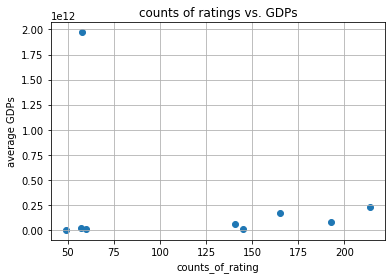

In [27]:
plt.scatter(gdp_vs_most_counts['counts_of_rating'], gdp_vs_most_counts['avg_gdp'])
plt.title(f'counts of ratings vs. GDPs')
plt.xlabel('counts_of_rating')
plt.ylabel('average GDPs')
plt.grid(True)



In [25]:
gdp_vs_top_ratings = top_rating_by_origin.join(top_origins_avg_gdp,how = "outer")
gdp_vs_top_ratings.dropna()

,Rating,avg_gdp
bean_origin,,
Venezuela,3.245327,2.309231e+11
Ecuador,3.134715,8.209280e+10
Peru,3.137879,1.663572e+11
Madagascar,3.265517,9.531462e+09
Dominican Republic,3.209220,5.988504e+10
Nicaragua,3.200000,1.045502e+10
Brazil,3.284483,1.971538e+12
Bolivia,3.197368,2.597513e+10
Belize,3.234694,1.562857e+09


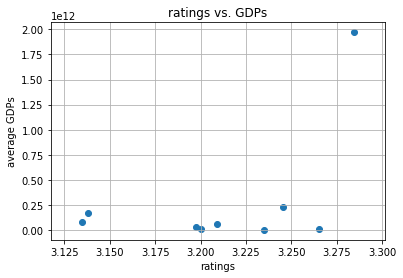

In [28]:
plt.scatter(gdp_vs_top_ratings['Rating'], gdp_vs_top_ratings['avg_gdp'])
plt.title(f'ratings vs. GDPs')
plt.xlabel('ratings')
plt.ylabel('average GDPs')
plt.grid(True)

In [30]:
most_counts_vs_top_ratings = top_rating_by_origin.join(most_counts_by_origin,how = "outer")
most_counts_vs_top_ratings.dropna()

,Rating,counts_of_rating
bean_origin,,
Belize,3.234694,49
Bolivia,3.197368,57
Brazil,3.284483,58
Dominican Republic,3.209220,141
Ecuador,3.134715,193
Madagascar,3.265517,145
Nicaragua,3.200000,60
Peru,3.137879,165
Venezuela,3.245327,214


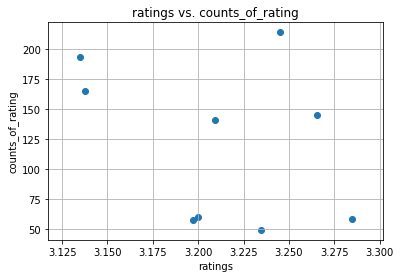

In [31]:
plt.scatter(most_counts_vs_top_ratings['Rating'], most_counts_vs_top_ratings['counts_of_rating'])
plt.title(f'ratings vs. counts_of_rating')
plt.xlabel('ratings')
plt.ylabel('counts_of_rating')
plt.grid(True)